In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [48]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv")

In [49]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [50]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [251]:
df.price

0         80
1        110
2        165
3        190
4        190
        ... 
2313    1400
2314    1400
2315    1400
2316    1400
2317    1400
Name: price, Length: 2318, dtype: int64

In [51]:
df.fuel.unique()

array(['gasoline', 'diesel', 'hybrid', 'lpg', 'cng'], dtype=object)

In [5]:
df.drive.unique()

array(['2wd', '4wd', 'awd'], dtype=object)

In [252]:
df.shape

(2318, 11)

# since the target variable is continous this is a Regression  problem statement

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


we are able to observe mark,model,transmission,drive,hand_drive,fuel as categorical columns

we can see id,price,year,mileage,engine_capacity as continous variables

In [11]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [8]:
df.id.nunique()

2318

since the id column is uniwue for each column it wont have any relation in the model we can drop that column

In [6]:
print(np.where(df.id==" "))

(array([], dtype=int64),)


In [7]:
df.drop('id',axis=1,inplace=True)

In [50]:
df.columns

Index(['price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

# Missing values

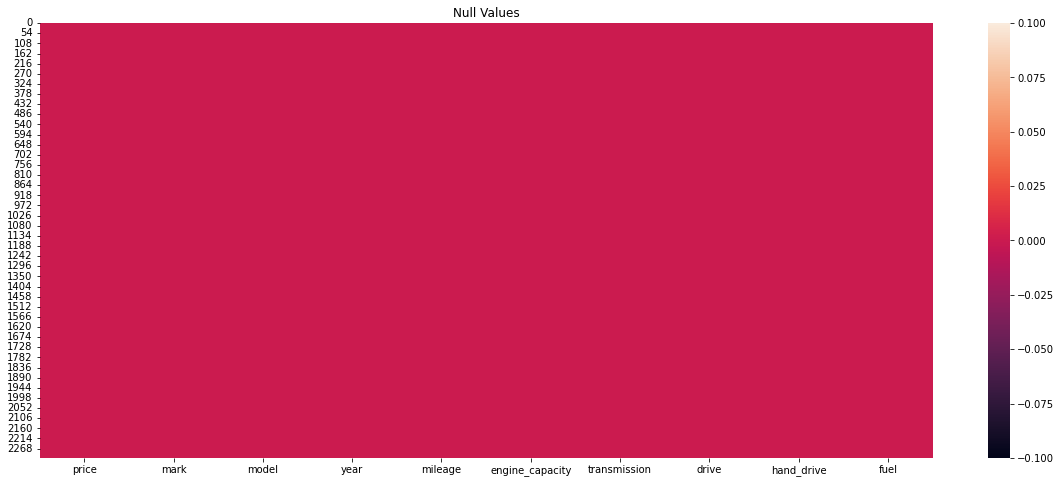

In [16]:
# heatmap on null values
plt.figure(figsize=[20,8])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

there are no null values in the dataset 

# EDA

# Visualization

# Univariate analysis

<AxesSubplot:xlabel='price'>

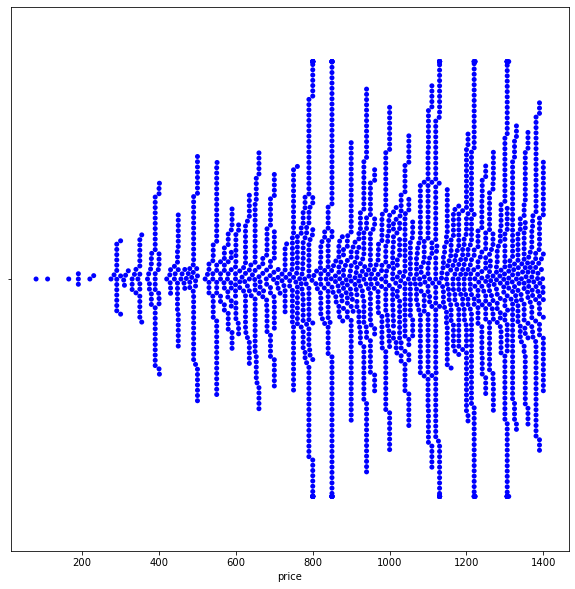

In [29]:
plt.figure(figsize=(10,10))
sns.swarmplot(df.price,color='blue',data=df)

<AxesSubplot:xlabel='year'>

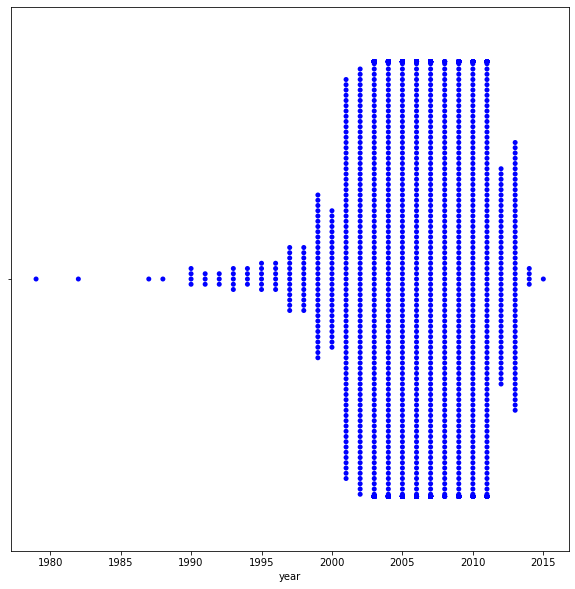

In [33]:
plt.figure(figsize=(10,10))
sns.swarmplot(df.year,color='blue',data=df)

<AxesSubplot:xlabel='engine_capacity'>

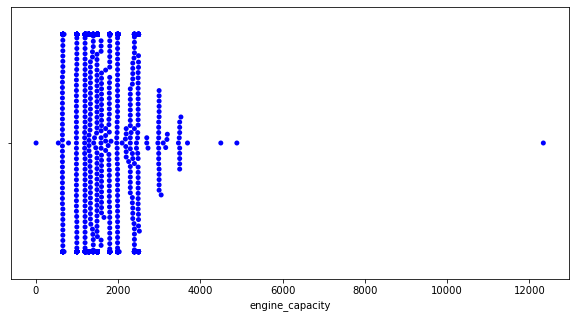

In [56]:
plt.figure(figsize=(10,5))
sns.swarmplot(df.engine_capacity,color='blue',data=df)

<AxesSubplot:ylabel='Frequency'>

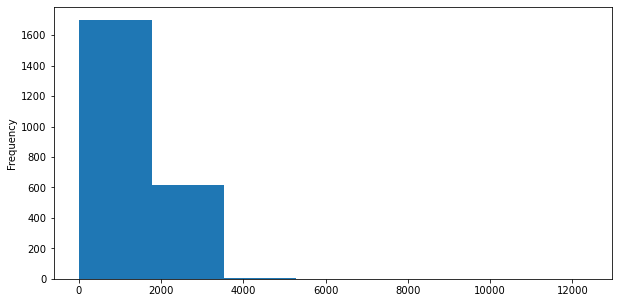

In [57]:
plt.figure(figsize=(10,5))
df.mileage.plot(kind='hist',bins=7)

<AxesSubplot:ylabel='Frequency'>

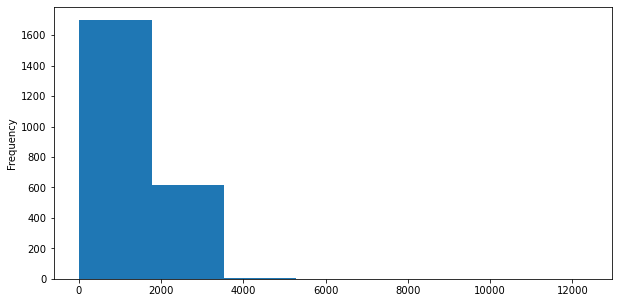

In [59]:
plt.figure(figsize=(10,5))
df.engine_capacity.plot(kind='hist',bins=7)

<AxesSubplot:ylabel='Frequency'>

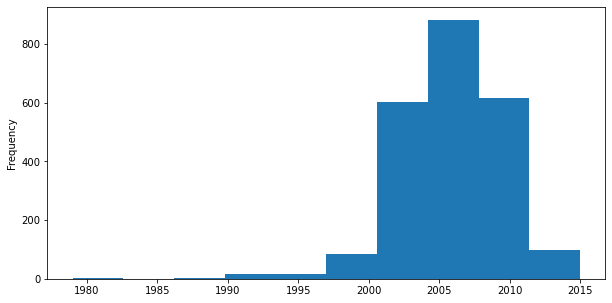

In [58]:
plt.figure(figsize=(10,5))
df.year.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

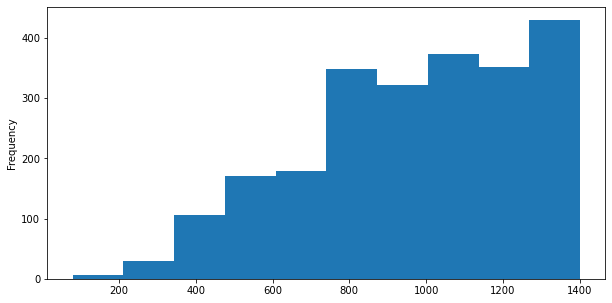

In [60]:
plt.figure(figsize=(10,5))
df.price.plot(kind='hist')

<AxesSubplot:xlabel='transmission', ylabel='count'>

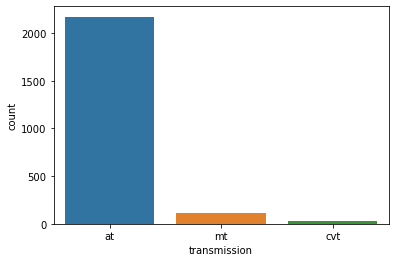

In [67]:
sns.countplot(df.mark)

<AxesSubplot:xlabel='model', ylabel='count'>

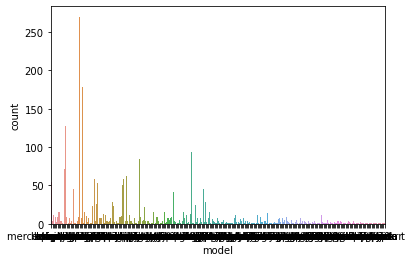

In [68]:
sns.countplot(df.model)

In [75]:
df.model.nunique()

258

<AxesSubplot:xlabel='transmission', ylabel='count'>

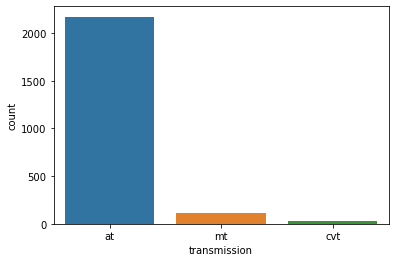

In [69]:
sns.countplot(df.transmission)

<AxesSubplot:xlabel='drive', ylabel='count'>

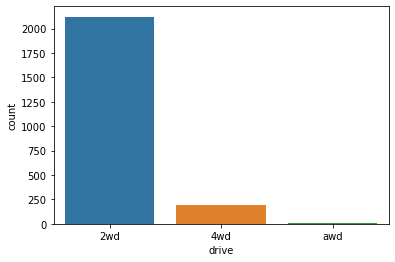

In [70]:
sns.countplot(df.drive)

<AxesSubplot:xlabel='hand_drive', ylabel='count'>

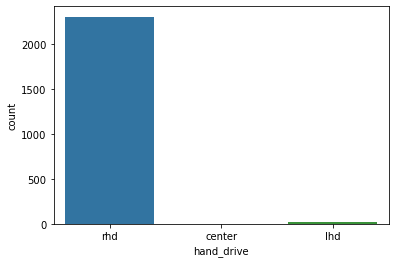

In [71]:
sns.countplot(df.hand_drive)

<AxesSubplot:xlabel='fuel', ylabel='count'>

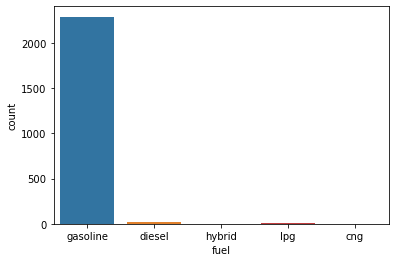

In [72]:
sns.countplot(df.fuel)

In [76]:
df.columns

Index(['price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

# Bivariant analysis

<AxesSubplot:xlabel='mark', ylabel='price'>

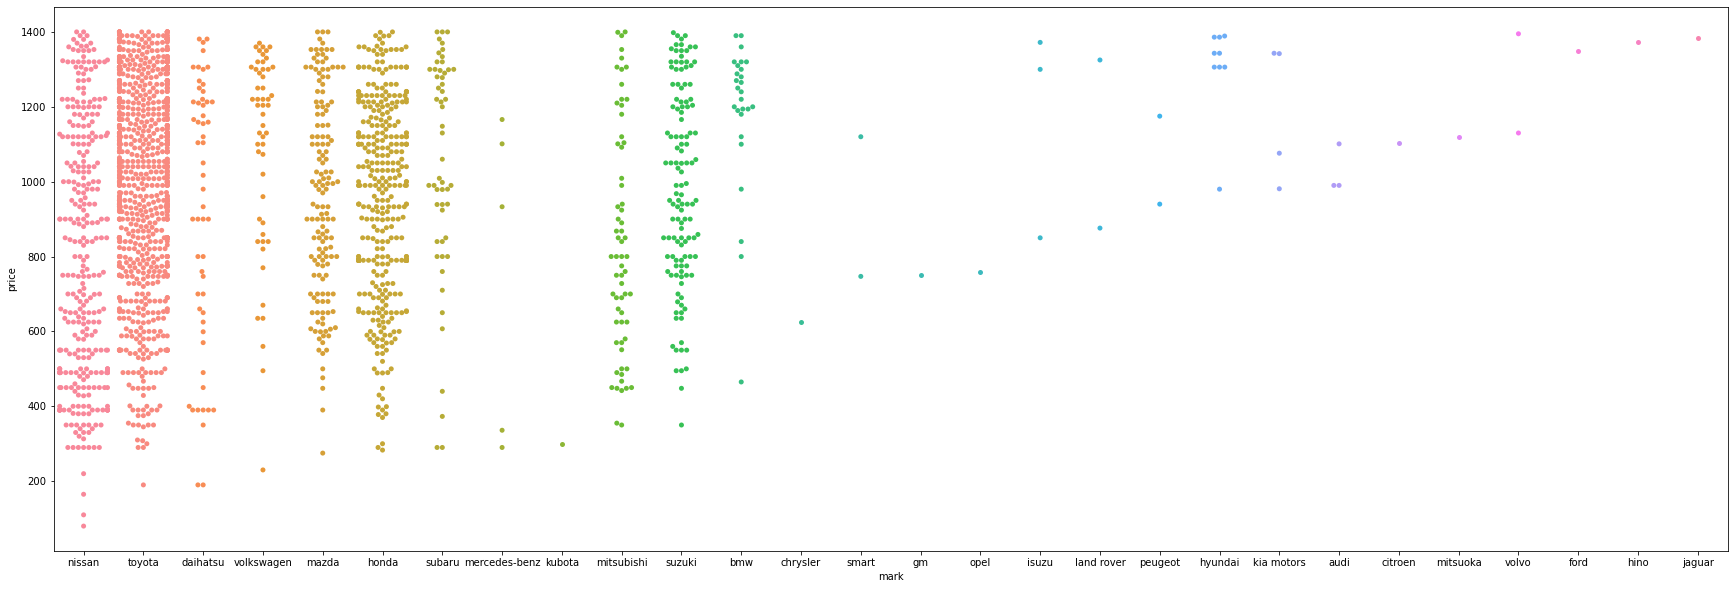

In [91]:
plt.figure(figsize=(30,10))
sns.swarmplot(x=df.mark,y=df.price)

<AxesSubplot:xlabel='year', ylabel='price'>

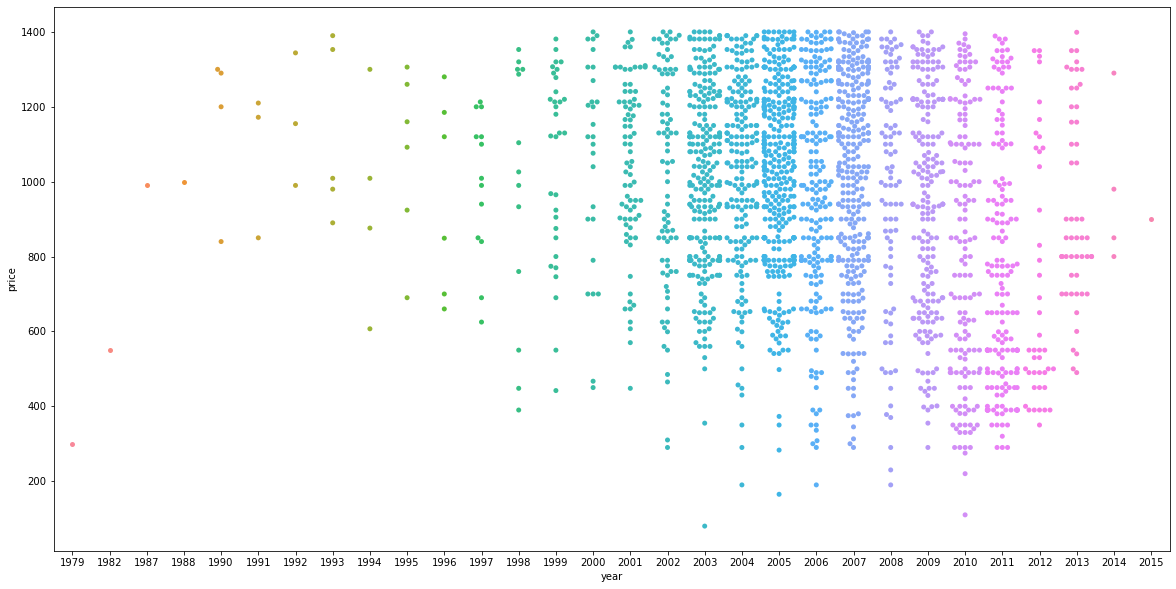

In [94]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df.year,y=df.price)

<AxesSubplot:xlabel='mileage', ylabel='price'>

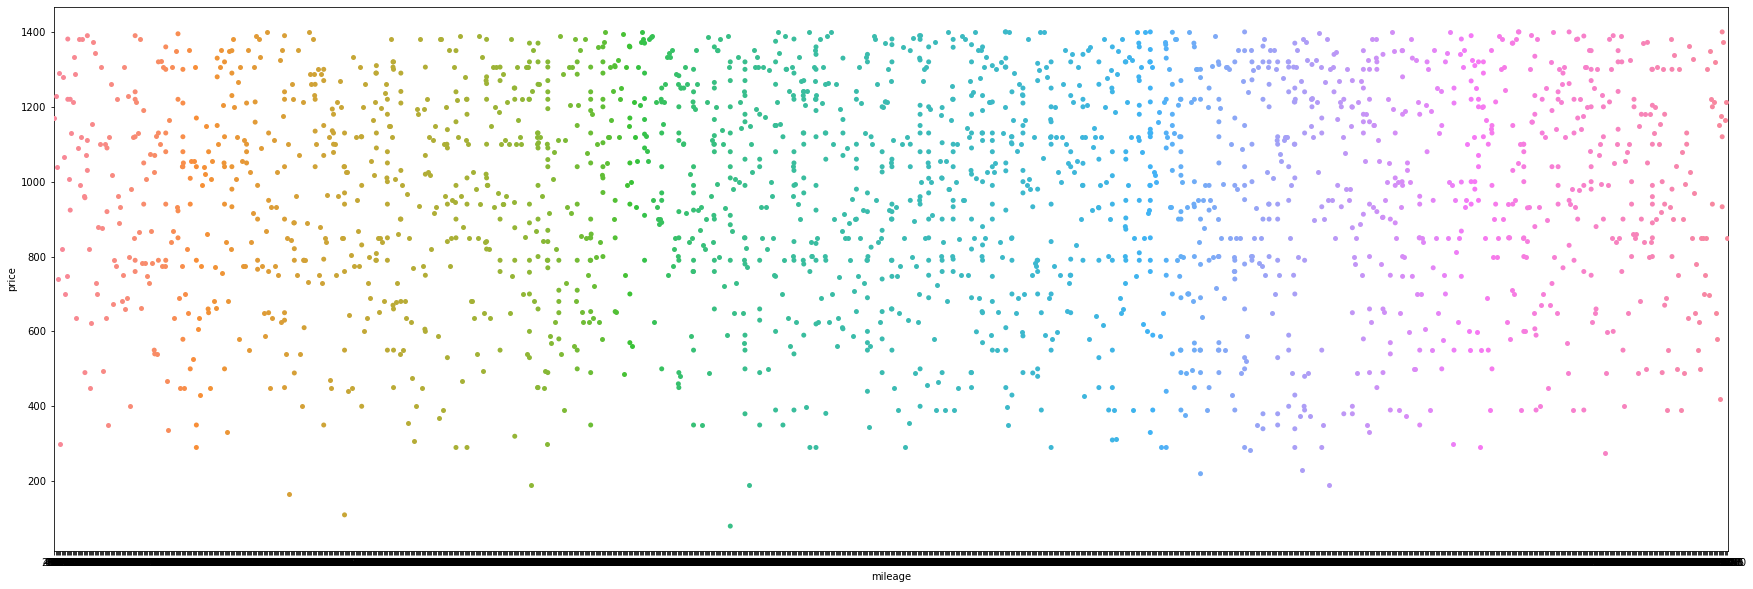

In [93]:
plt.figure(figsize=(30,10))
sns.swarmplot(x=df.mileage,y=df.price)

In [112]:
df.columns


Index(['price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

<AxesSubplot:xlabel='fuel', ylabel='price'>

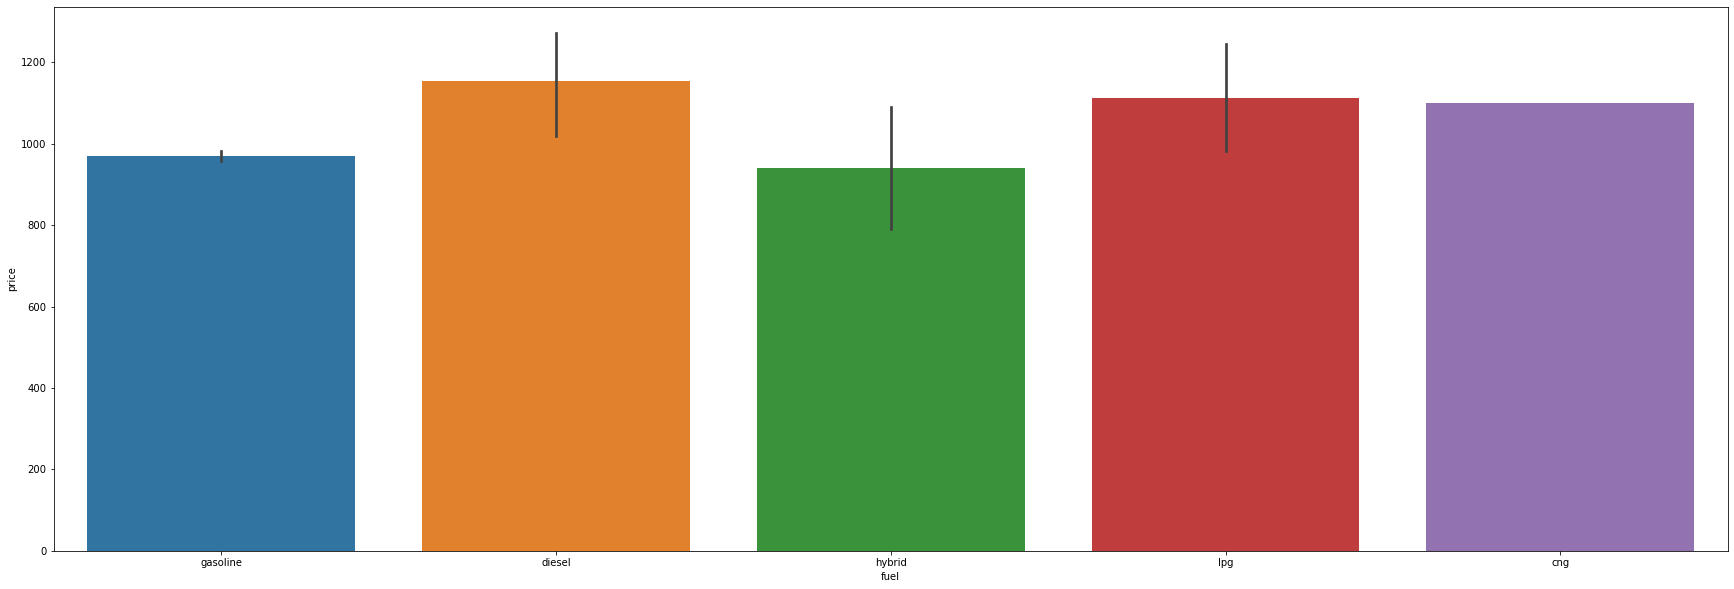

In [105]:
plt.figure(figsize=(30,10))
sns.barplot(x=df.fuel,y=df.price,data=df)

<AxesSubplot:xlabel='hand_drive', ylabel='price'>

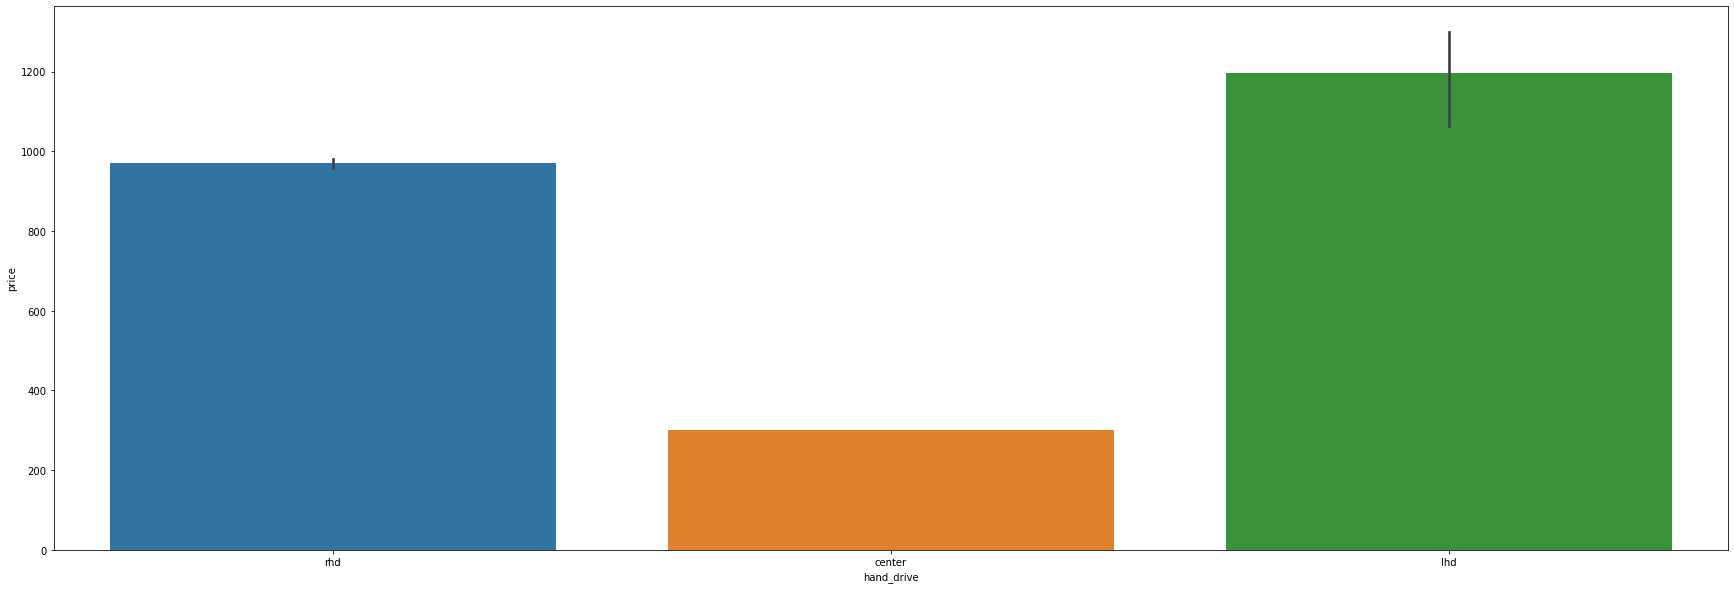

In [104]:
plt.figure(figsize=(30,10))
sns.barplot(x=df.hand_drive,y=df.price,data=df)

<AxesSubplot:xlabel='transmission', ylabel='price'>

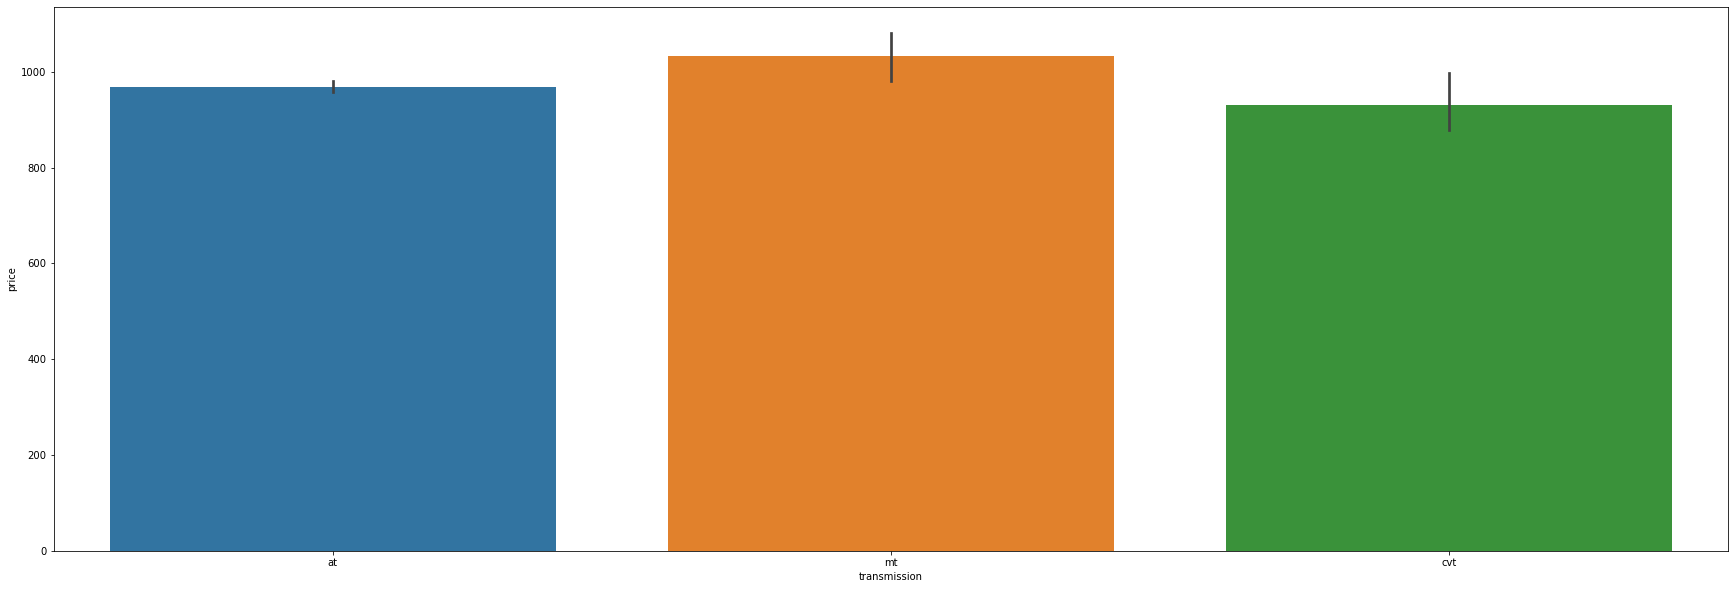

In [103]:
plt.figure(figsize=(30,10))
sns.barplot(x=df.transmission,y=df.price,data=df)

<AxesSubplot:xlabel='model', ylabel='price'>

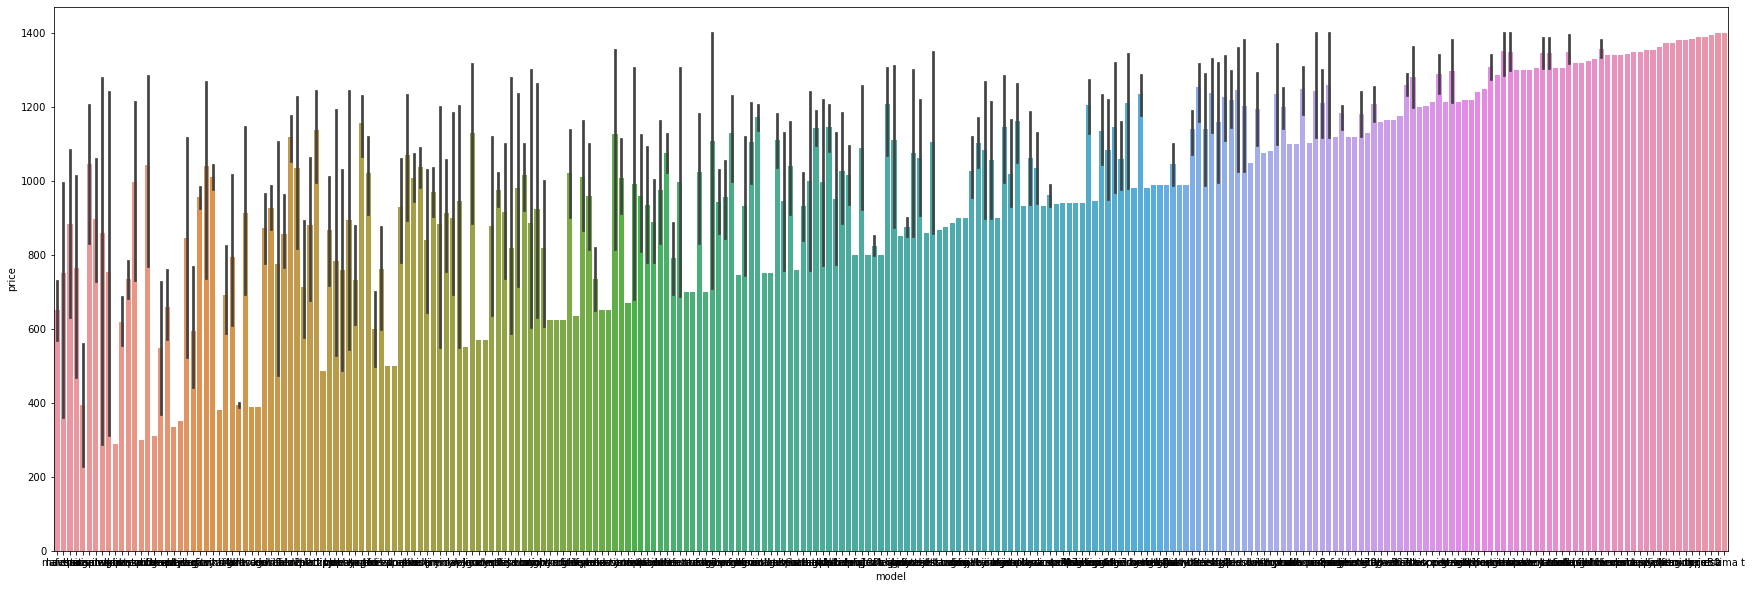

In [102]:
plt.figure(figsize=(30,10))
sns.barplot(x=df.model,y=df.price,data=df)

# Multivariate analysis:

<Figure size 4320x2160 with 0 Axes>

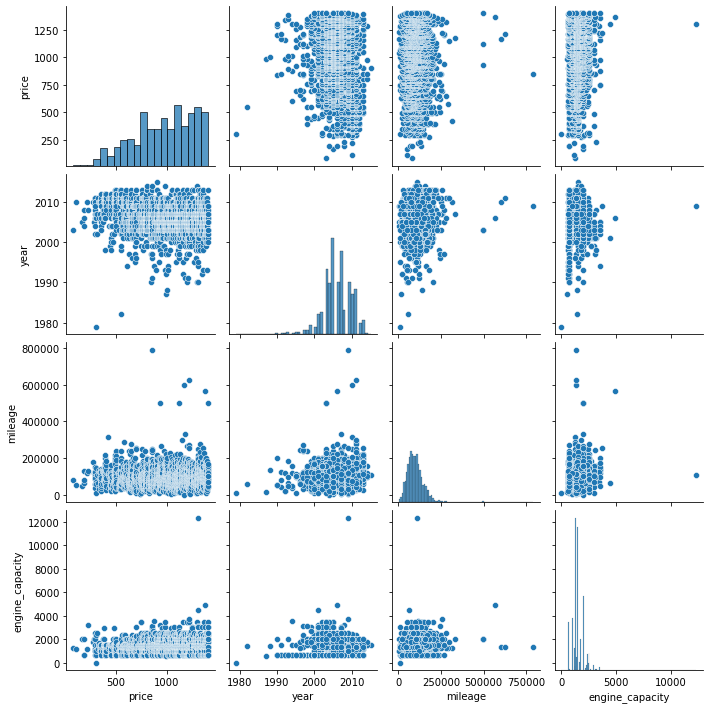

In [111]:
plt.figure(figsize=(60,30))
sns.pairplot(df)

# Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [9]:
df.mark=LE.fit_transform(df.mark)

In [10]:
df.model=LE.fit_transform(df.model)

In [11]:
df.drive=LE.fit_transform(df.drive)

In [12]:
df.transmission=LE.fit_transform(df.transmission)

In [13]:
df.hand_drive =LE.fit_transform(df.hand_drive)

In [14]:
df.fuel=LE.fit_transform(df.fuel)

In [15]:
df

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,19,143,2003,80000,1240,0,0,2,2
1,110,19,143,2010,53000,1200,0,0,2,2
2,165,19,134,2005,47690,2000,0,0,2,2
3,190,25,29,2008,130661,1990,0,0,2,2
4,190,4,155,2006,66300,660,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...
2313,1400,25,242,2009,121000,996,0,0,2,2
2314,1400,25,100,2003,101000,3000,0,0,2,2
2315,1400,23,195,2005,101000,660,1,0,2,2
2316,1400,8,256,2000,170000,660,0,1,2,2


In [18]:
df.hand_drive.nunique()

3

In [19]:
df.hand_drive.unique()

array([2, 0, 1])

# Detecting Outliers

In [59]:
columns=df.columns

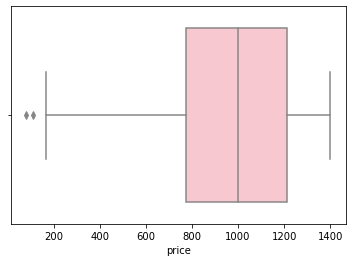

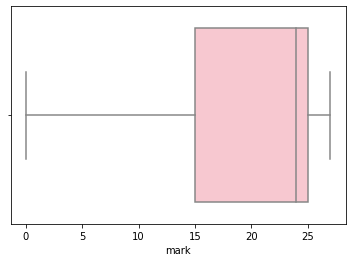

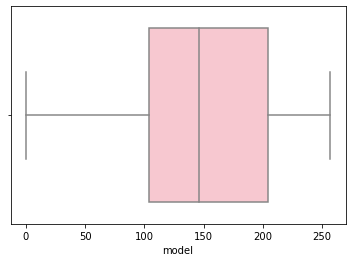

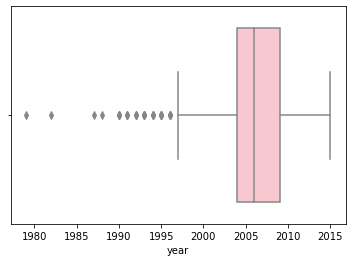

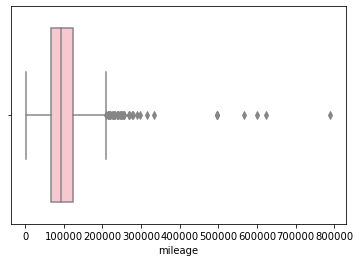

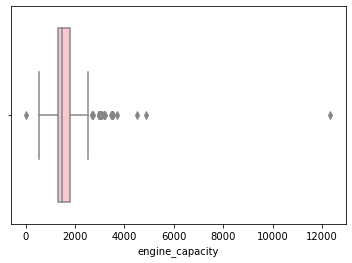

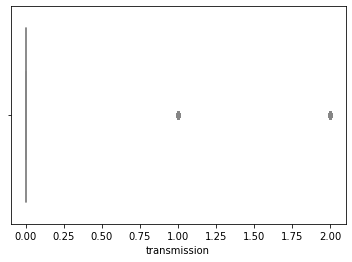

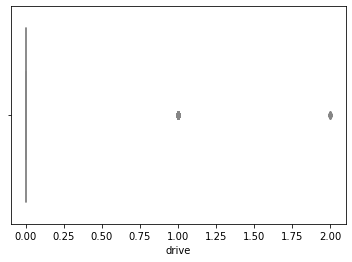

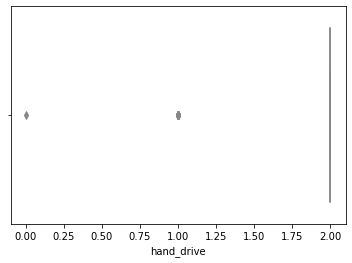

In [135]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[columns[a]],color='pink')
    
for i in range(0,9):
    bxplt(i)

In [115]:
df.shape

(2318, 10)

In [60]:
collist=df.columns.values
ncol=9
nrows=8


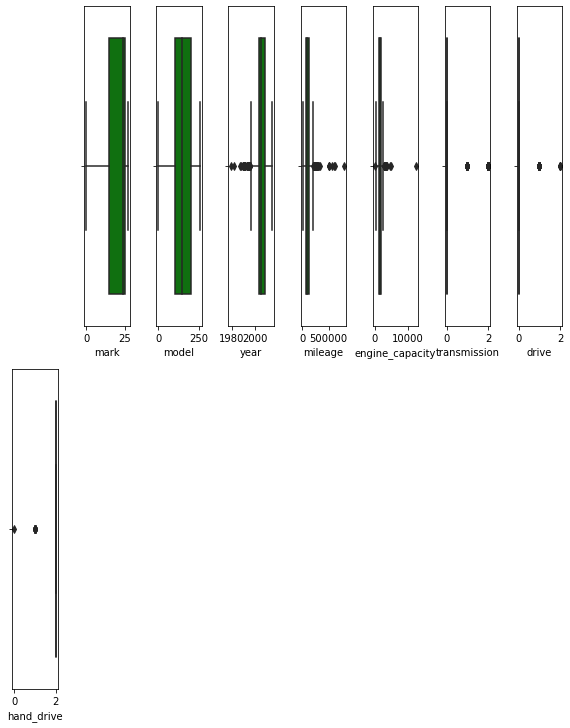

In [141]:
# to see outliers in a single visualization

plt.figure(figsize=(ncol,5*ncol))
for i in range(1,(len(collist)-1)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# lets remove Outliers

In [20]:
#zscore

from scipy.stats import zscore
z1=np.abs(zscore(df))
z1

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,3.089012,0.057772,0.071399,0.803769,0.381195,0.485945,0.253487,0.300919,0.083893,0.011522
1,2.985066,0.057772,0.071399,1.089113,0.895470,0.558743,0.253487,0.300919,0.083893,0.011522
2,2.794498,0.057772,0.202693,0.262946,0.996610,0.897214,0.253487,0.300919,0.083893,0.011522
3,2.707876,0.783580,1.734453,0.548289,0.583755,0.879015,0.253487,0.300919,0.083893,0.011522
4,2.707876,2.161152,0.103659,0.007466,0.642142,1.541515,0.253487,0.300919,0.083893,0.011522
...,...,...,...,...,...,...,...,...,...,...
2313,1.484621,0.783580,1.372832,0.818701,0.399740,0.930012,0.253487,0.300919,0.083893,0.011522
2314,1.484621,0.783580,0.698692,0.803769,0.018796,2.717161,0.253487,0.300919,0.083893,0.011522
2315,1.484621,0.503129,0.687187,0.262946,0.018796,1.541515,1.972205,0.300919,0.083893,0.011522
2316,1.484621,1.600250,1.577067,1.615004,1.333053,1.541515,0.253487,3.152204,0.083893,0.011522


In [21]:
threshold=3
print(np.where(z1>3))

(array([   0,    7,    7,    8,   10,   23,   23,   23,   23,   23,   52,
         54,   75,   87,  103,  111,  111,  132,  134,  138,  145,  146,
        160,  171,  171,  186,  196,  198,  243,  246,  247,  249,  249,
        253,  259,  268,  274,  293,  309,  312,  312,  314,  334,  353,
        359,  401,  401,  404,  406,  409,  414,  416,  432,  441,  444,
        446,  456,  466,  467,  472,  485,  492,  495,  495,  502,  503,
        507,  507,  508,  529,  533,  549,  551,  580,  594,  674,  675,
        681,  691,  693,  696,  696,  700,  723,  724,  729,  732,  738,
        739,  740,  740,  741,  741,  742,  743,  749,  750,  750,  751,
        752,  753,  811,  818,  818,  820,  823,  829,  834,  841,  842,
        842,  854,  862,  862,  869,  877,  879,  883,  891,  908,  913,
        926,  927,  927,  938,  940,  941,  954,  956,  956,  958,  970,
        971,  971,  973,  979, 1001, 1003, 1004, 1006, 1006, 1006, 1012,
       1019, 1024, 1036, 1046, 1065, 1065, 1066, 1

In [22]:
df_new1=df[(z1<3).all(axis=1)]

In [23]:
#chcking data loss
data_loss=((df.shape[0]-df_new1.shape[0])/df.shape[0])*100
print(data_loss)

13.718723037100949


able to see data loss

In [24]:
#zscore

from scipy.stats import zscore
z=np.abs(zscore(df))
z

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,3.089012,0.057772,0.071399,0.803769,0.381195,0.485945,0.253487,0.300919,0.083893,0.011522
1,2.985066,0.057772,0.071399,1.089113,0.895470,0.558743,0.253487,0.300919,0.083893,0.011522
2,2.794498,0.057772,0.202693,0.262946,0.996610,0.897214,0.253487,0.300919,0.083893,0.011522
3,2.707876,0.783580,1.734453,0.548289,0.583755,0.879015,0.253487,0.300919,0.083893,0.011522
4,2.707876,2.161152,0.103659,0.007466,0.642142,1.541515,0.253487,0.300919,0.083893,0.011522
...,...,...,...,...,...,...,...,...,...,...
2313,1.484621,0.783580,1.372832,0.818701,0.399740,0.930012,0.253487,0.300919,0.083893,0.011522
2314,1.484621,0.783580,0.698692,0.803769,0.018796,2.717161,0.253487,0.300919,0.083893,0.011522
2315,1.484621,0.503129,0.687187,0.262946,0.018796,1.541515,1.972205,0.300919,0.083893,0.011522
2316,1.484621,1.600250,1.577067,1.615004,1.333053,1.541515,0.253487,3.152204,0.083893,0.011522


In [25]:
threshold=3.3
print(np.where(z>3.2))

(array([   8,   10,   23,   23,   23,   23,   52,  103,  111,  138,  145,
        146,  171,  249,  249,  268,  312,  312,  359,  401,  406,  414,
        444,  466,  467,  472,  495,  507,  508,  533,  549,  594,  674,
        696,  729,  740,  740,  741,  741,  749,  750,  750,  811,  818,
        829,  841,  842,  842,  862,  862,  908,  927,  940,  956,  971,
        971,  979, 1003, 1004, 1006, 1006, 1012, 1046, 1065, 1066, 1076,
       1077, 1080, 1080, 1083, 1084, 1091, 1091, 1092, 1092, 1094, 1125,
       1125, 1126, 1128, 1128, 1131, 1132, 1142, 1160, 1160, 1171, 1171,
       1172, 1172, 1201, 1213, 1258, 1291, 1315, 1341, 1352, 1353, 1356,
       1380, 1387, 1393, 1408, 1412, 1441, 1459, 1459, 1477, 1488, 1520,
       1572, 1572, 1576, 1576, 1581, 1582, 1587, 1592, 1607, 1607, 1609,
       1609, 1609, 1610, 1611, 1633, 1656, 1664, 1665, 1670, 1672, 1676,
       1681, 1682, 1682, 1703, 1703, 1706, 1706, 1713, 1719, 1726, 1726,
       1727, 1727, 1729, 1729, 1736, 1772, 1779, 1

In [26]:
df_new=df[(z<3.2).all(axis=1)]

In [27]:
#chcking data loss
data_loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
print(data_loss)

7.161345987920622


with threshold=3.2 we are able to reduce the data loss with in 10%.by trial and error reduced the data loss in the dataset 

In [28]:
df_new.shape

(2152, 10)

In [29]:
df.shape

(2318, 10)

In [30]:
df=df_new

# Skewness check

<AxesSubplot:xlabel='mark', ylabel='Density'>

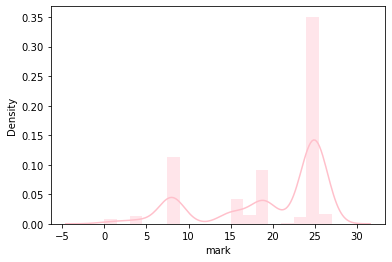

In [72]:
sns.distplot(df.mark,color='pink')


<AxesSubplot:xlabel='year', ylabel='Density'>

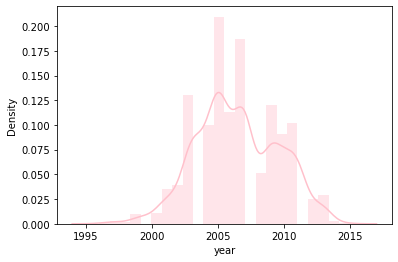

In [274]:
sns.distplot(df.year,color='pink')


<AxesSubplot:xlabel='mileage', ylabel='Density'>

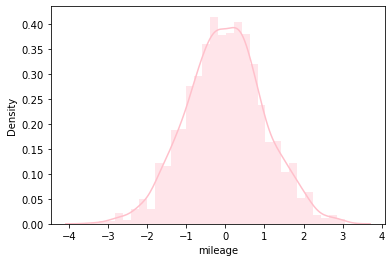

In [275]:
sns.distplot(df.mileage,color='pink')


<AxesSubplot:xlabel='engine_capacity', ylabel='Density'>

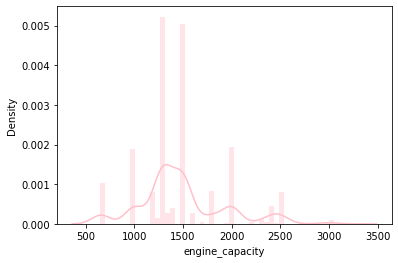

In [276]:
sns.distplot(df.engine_capacity,color='pink')


<AxesSubplot:xlabel='transmission', ylabel='Density'>

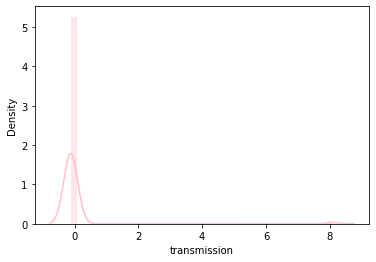

In [277]:
sns.distplot(df.transmission,color='pink')


<AxesSubplot:xlabel='drive', ylabel='Density'>

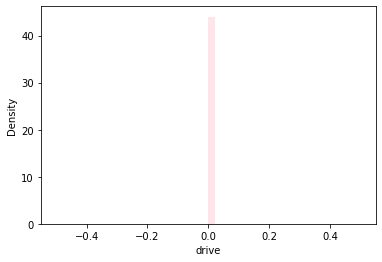

In [278]:
sns.distplot(df.drive,color='pink')


<AxesSubplot:xlabel='hand_drive', ylabel='Density'>

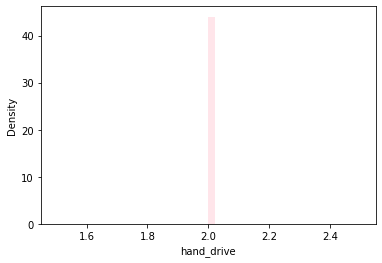

In [279]:
sns.distplot(df.hand_drive,color='pink')


<AxesSubplot:xlabel='fuel', ylabel='Density'>

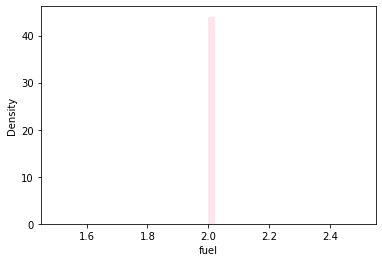

In [280]:
sns.distplot(df.fuel,color='pink')


In [31]:
#initialising x and y
X=df.drop(['price'],axis=1)
y=df.price

In [32]:
X.shape

(2152, 9)

In [33]:
y.shape

(2152,)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2317
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            2152 non-null   int64
 1   mark             2152 non-null   int32
 2   model            2152 non-null   int32
 3   year             2152 non-null   int64
 4   mileage          2152 non-null   int64
 5   engine_capacity  2152 non-null   int64
 6   transmission     2152 non-null   int32
 7   drive            2152 non-null   int32
 8   hand_drive       2152 non-null   int32
 9   fuel             2152 non-null   int32
dtypes: int32(6), int64(4)
memory usage: 134.5 KB


In [35]:
X.skew().sort_values(ascending=False)

transmission       8.297194
drive              3.396089
engine_capacity    0.725720
mileage            0.626668
year               0.012407
hand_drive         0.000000
fuel               0.000000
model             -0.292729
mark              -0.999156
dtype: float64

we are able to observe mark,model,transmission,drive,hand_drive,fuel as categorical columns

mileage,engine_capacity  are having skewness so we need to remove it,rest are categorical

Reducing skewness

In [78]:
from sklearn.preprocessing import PowerTransformer



In [79]:
X['mileage']=PowerTransformer().fit_transform(X['mileage'].values.reshape(-1,1))

X['engine_capacity']=np.log(X['engine_capacity'].values.reshape(-1,1))

In [81]:
X.skew().sort_values(ascending=False)

transmission       8.297194
drive              3.396089
year               0.012407
mileage            0.005330
hand_drive         0.000000
fuel               0.000000
model             -0.292729
engine_capacity   -0.378699
mark              -0.999156
dtype: float64

In [42]:
columns=df.columns

In [46]:
columns

Index(['price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [45]:
def bxplt(a):
    plt.figure()
    sns.distplot(df[columns[a]],color='pink')
    
for i in range(0,):
    bxplt(i)


In [39]:
X.drive.nunique()
X.hand_drive.nunique()

1

In [302]:
X.skew().sort_values(ascending=False)

year               0.028170
transmission       0.000000
drive              0.000000
hand_drive         0.000000
fuel               0.000000
mileage           -0.003249
model             -0.290422
engine_capacity   -0.317394
mark              -0.993199
dtype: float64

In [84]:
temp=X.columns

In [98]:
temp

Index(['mark', 'model', 'year', 'mileage', 'engine_capacity', 'transmission',
       'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [85]:
X.shape[1]

9

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
#scaling the dataset 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [88]:
X_scaled

array([[-0.08852782, -0.0941709 , -1.03999398, ..., -0.2727424 ,
         0.        ,  0.        ],
       [-0.08852782, -0.0941709 ,  1.15942611, ..., -0.2727424 ,
         0.        ,  0.        ],
       [-0.08852782, -0.22698252, -0.41158824, ..., -0.2727424 ,
         0.        ,  0.        ],
       ...,
       [ 0.47511677,  0.67318514, -0.41158824, ..., -0.2727424 ,
         0.        ,  0.        ],
       [-1.63855045,  1.5733528 , -1.98260259, ...,  3.66646328,
         0.        ,  0.        ],
       [ 0.75693907, -0.71395847, -0.41158824, ..., -0.2727424 ,
         0.        ,  0.        ]])

In [89]:
X=pd.DataFrame(X_scaled,columns=temp)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X,i) for i in range(X.shape[1])]


In [97]:
vif["features"]=temp
vif

,vif,features
0,1.176414,mark
1,1.196568,model
2,1.139734,year
3,1.063080,mileage
4,1.152052,engine_capacity
5,1.014201,transmission
6,1.087381,drive
7,NaN,hand_drive
8,NaN,fuel


In [99]:
vif1=pd.DataFrame()
vif1["vif"]=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif1["features"]=temp
vif1

,vif,features
0,1.176414,mark
1,1.196568,model
2,1.139734,year
3,1.063080,mileage
4,1.152052,engine_capacity
5,1.014201,transmission
6,1.087381,drive
7,NaN,hand_drive
8,NaN,fuel


# Correlation Check

In [100]:
df_cor=df.corr()

<AxesSubplot:>

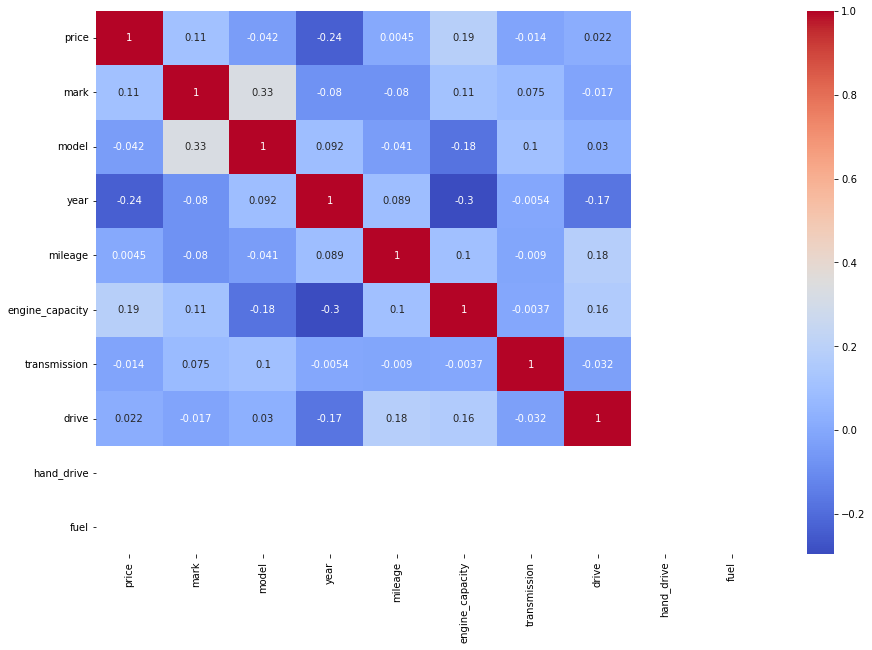

In [101]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cor,cmap='coolwarm',annot=True)

In [106]:
X.hand_drive.unique()

array([0.])